In [1]:
# LSTM model to forecast the air quality in Beijing at the Aotizhongxin station
# Import time module
from datetime import datetime as dt

# Record start time
start = dt.now()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read custom classes and functions

from myDataWindow import DataWindow
from myDeepFunctions import compile_and_fit

In [3]:
# Read the training set, the validation set, and the test
# Note: Omitting to specify index_col results in a higher MAE
train_df = pd.read_csv('../data/train_ahx.csv', index_col=0)
val_df = pd.read_csv('../data/val_ahx.csv', index_col=0)
test_df = pd.read_csv('../data/test_ahx.csv', index_col=0)

In [4]:
# Create a data window to train the model
wide_window = DataWindow(input_width=24, label_width=24, shift=1,
                        train_df=train_df,
                        val_df=val_df,
                        test_df=test_df,
                        label_columns=['NO2'])

In [5]:
# Define our LSTM model in Keras

# use the Sequential model to allow us to stack different layers in our network
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM

# Set return_sequences to True to make sure that past information is being used by the network
# define the output layer, a Dense layer = 1, since forecasting is for concentration of Nitrogen dioxide (NO2) only
lstm_model = Sequential([
    LSTM(32, return_sequences = True),
    Dense(units=1)
])

#Train the model
history = compile_and_fit(lstm_model, wide_window)

val_performance = {}
performance = {}

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/50
767/767 [==============================] - 71s 82ms/step - loss: 0.0055 - mean_absolute_error: 0.0496 - val_loss: 0.0016 - val_mean_absolute_error: 0.0284
Epoch 2/50
767/767 [==============================] - 64s 83ms/step - loss: 0.0020 - mean_absolute_error: 0.0298 - val_loss: 0.0014 - val_mean_absolute_error: 0.0237
Epoch 3/50
767/767 [==============================] - 57s 75ms/step - loss: 0.0020 - mean_absolute_error: 0.0289 - val_loss: 0.0015 - val_mean_absolute_error: 0.0257
Epoch 4/50
767/767 [==============================] - 36s 47ms/step - loss: 0.0019 - mean_absolute_error: 0.0286 - val_loss: 0.0014 - val_mean_absolute_error: 0.0252
Epoch 5/50
767/767 [==============================] - 34s 44ms/step - loss: 0.0019 - mean_absolute_error: 0.0285 - val_loss: 0.0013 - val_mean_absolute_error: 0.0235
Epoch 6/50
767/767 [==============================] - 73s 96ms/step - loss: 0.0019 - mean_absolute_error: 0.0284 - val_loss: 0.0013 - val_mean_absolute_error: 0.0230
Epoc

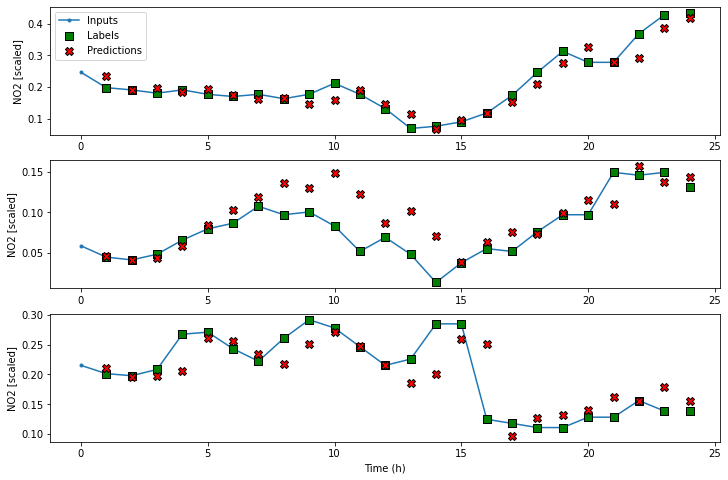

In [6]:
# Visualize the predictions of our model on 3 sampled sequences using the plot method of our data window
wide_window.plot(lstm_model, plot_col='NO2')

In [7]:
# Mean Absolute Error
print(performance['LSTM'][1])

0.031054887920618057


In [8]:
# List previous single step results to be used for comparison

model_list = ['Baseline - Last', 'Linear', 'Dense']

mae_val = [0.024, 0.024, 0.026]
mae_test = [0.032, 0.032, 0.037]

# Add LSTM model results
model_list.append('LSTM')

mae_val.append(val_performance['LSTM'][1])
mae_test.append(performance['LSTM'][1])

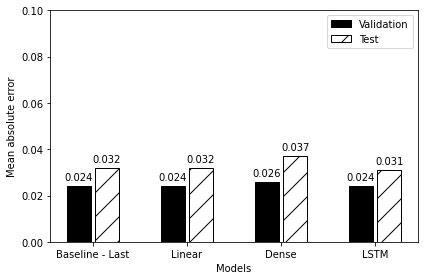

In [9]:
# Compare the MAEs of the LSTM, DNN linear model and the baseline
x = np.arange(len(model_list))

fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel("Mean absolute error")
ax.set_xlabel("Models")

for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')
    
plt.ylim(0, 0.1)
plt.xticks(ticks=x, labels=model_list)
plt.legend(loc='best')
plt.tight_layout()

In [10]:
# Implementing an LSTM as a multi-step model
multi_window = DataWindow(input_width=24, label_width=24, shift=24, 
                         train_df = train_df,
                         val_df = val_df,
                         test_df = test_df,
                         label_columns=['NO2'])

In [11]:
# Define model in Keras

ms_lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(1, kernel_initializer = tf.initializers.zeros)
])

In [12]:
# Train the model and store its evaluation metrics for comparison
history = compile_and_fit(ms_lstm_model, multi_window)

ms_val_performance={}
ms_performance = {}

ms_val_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.val)
ms_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
766/766 [==============================] - 42s 46ms/step - loss: 0.0145 - mean_absolute_error: 0.0924 - val_loss: 0.0095 - val_mean_absolute_error: 0.0781
Epoch 2/50
766/766 [==============================] - 42s 55ms/step - loss: 0.0127 - mean_absolute_error: 0.0865 - val_loss: 0.0085 - val_mean_absolute_error: 0.0717
Epoch 3/50
766/766 [==============================] - 55s 72ms/step - loss: 0.0126 - mean_absolute_error: 0.0861 - val_loss: 0.0088 - val_mean_absolute_error: 0.0731
Epoch 4/50
766/766 [==============================] - 53s 69ms/step - loss: 0.0125 - mean_absolute_error: 0.0858 - val_loss: 0.0087 - val_mean_absolute_error: 0.0725
Epoch 5/50
218/218 [==============================] - 7s 29ms/step - loss: 0.0087 - mean_absolute_error: 0.0721: 1s - loss: 0.0087 - mean_abs


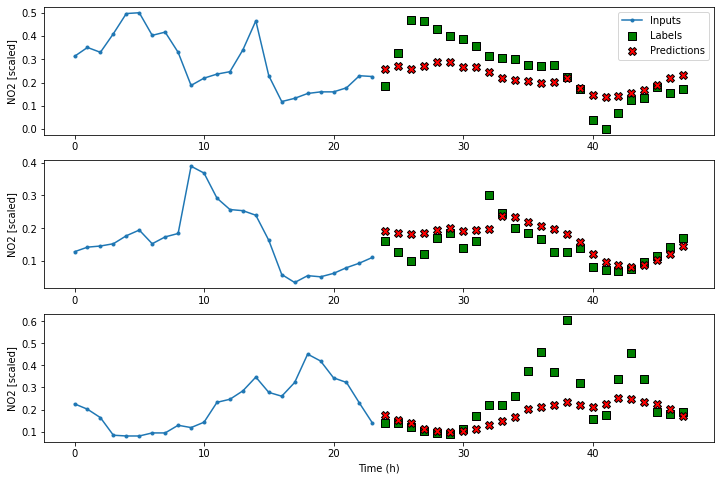

In [13]:
# Visualize the predictions of our model on 3 sampled sequences using the plot method of our data window
multi_window.plot(ms_lstm_model, plot_col='NO2')

In [14]:
# Mean Absolute Error
print(ms_performance['LSTM'][1])

0.1084379032254219


In [15]:
# List previous multi step results to be used for comparison

multi_model_list = ['Baseline - Last', 'Baseline - Repeat', 'Linear', 'Dense']

multi_mae_val = [0.33, 0.328, 0.08, 0.079]
multi_mae_test = [0.257, 0.267, 0.109, 0.112]

# Add LSTM model results
multi_model_list.append('LSTM')

multi_mae_val.append(ms_val_performance['LSTM'][1])
multi_mae_test.append(ms_performance['LSTM'][1])

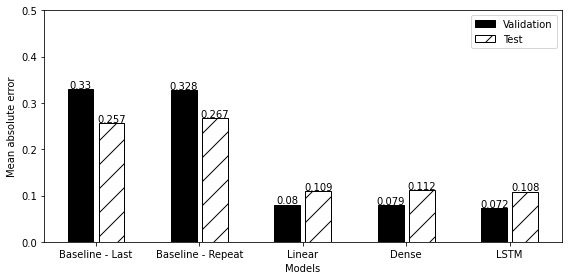

In [16]:
# Compare the MAEs of the LSTM, DNN linear model and the baselines
x = np.arange(len(multi_model_list))

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x - 0.15, multi_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, multi_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel("Mean absolute error")
ax.set_xlabel("Models")

for index, value in enumerate(multi_mae_val):
    plt.text(x=index - 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(multi_mae_test):
    plt.text(x=index + 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')
    
plt.ylim(0, 0.5)
plt.xticks(ticks=x, labels=multi_model_list)
plt.legend(loc='best')
plt.tight_layout()

In [17]:
# Implement an LSTM as a multi-output model
mo_wide_window = DataWindow(input_width=24, label_width=24, shift=1, 
                         train_df = train_df,
                         val_df = val_df,
                         test_df = test_df,
                         label_columns=['TEMP', 'NO2'])

In [18]:
# Define the model
mo_lstm_model = Sequential([
    LSTM(32, return_sequences = True),
    # Two units for two targets i.e. NO2 & Temperature
    Dense(units = 2)
])

# Train model and store its performance metrics for comparison
history = compile_and_fit(mo_lstm_model, mo_wide_window)

mo_val_performance = {}
mo_performance = {}

mo_val_performance['LSTM'] = mo_lstm_model.evaluate(mo_wide_window.val)
mo_performance['LSTM'] = mo_lstm_model.evaluate(mo_wide_window.test, verbose=0)

Epoch 1/50
767/767 [==============================] - 67s 77ms/step - loss: 0.0081 - mean_absolute_error: 0.0551 - val_loss: 0.0017 - val_mean_absolute_error: 0.0283
Epoch 2/50
767/767 [==============================] - 51s 66ms/step - loss: 0.0016 - mean_absolute_error: 0.0258 - val_loss: 9.8299e-04 - val_mean_absolute_error: 0.0206
Epoch 3/50
767/767 [==============================] - 35s 46ms/step - loss: 0.0012 - mean_absolute_error: 0.0220 - val_loss: 8.9085e-04 - val_mean_absolute_error: 0.0187
Epoch 4/50
767/767 [==============================] - 32s 42ms/step - loss: 0.0012 - mean_absolute_error: 0.0211 - val_loss: 8.4742e-04 - val_mean_absolute_error: 0.0177
Epoch 5/50
767/767 [==============================] - 32s 41ms/step - loss: 0.0012 - mean_absolute_error: 0.0208 - val_loss: 8.4124e-04 - val_mean_absolute_error: 0.0176
Epoch 6/50
767/767 [==============================] - 32s 42ms/step - loss: 0.0012 - mean_absolute_error: 0.0207 - val_loss: 8.4714e-04 - val_mean_absolut

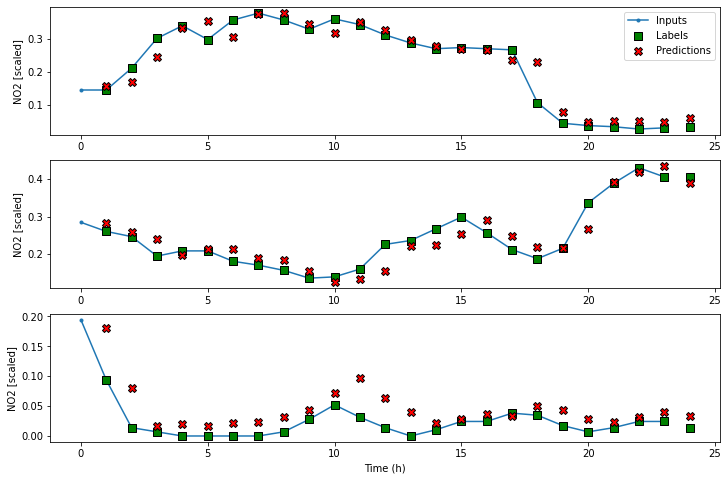

In [19]:
mo_wide_window.plot(mo_lstm_model, plot_col='NO2')

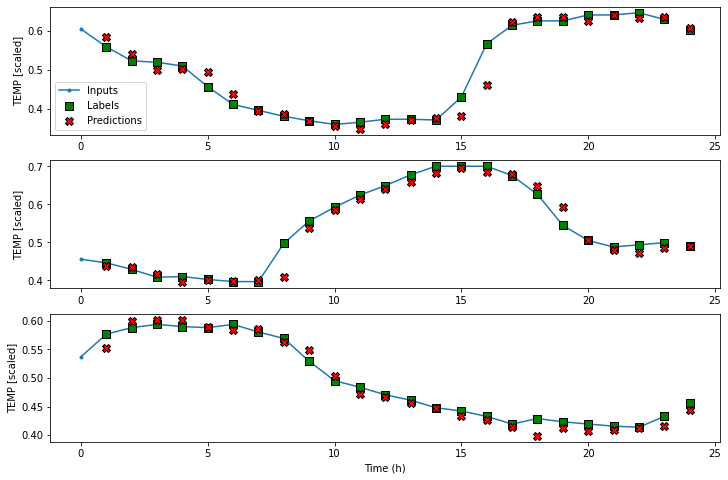

In [20]:
mo_wide_window.plot(mo_lstm_model, plot_col='TEMP')

In [21]:
# Mean Absolute Error
print(mo_performance['LSTM'][1])

0.022520335391163826


In [22]:
# List previous multi output results to be used for comparison

mo_model_list = ['Baseline - Last', 'Linear', 'Dense']

mo_mae_val = [0.02, 0.019, 0.023]
mo_mae_test = [0.024, 0.023, 0.028]

# Add LSTM model results
mo_model_list.append('LSTM')

mo_mae_val.append(mo_val_performance['LSTM'][1])
mo_mae_test.append(mo_performance['LSTM'][1])

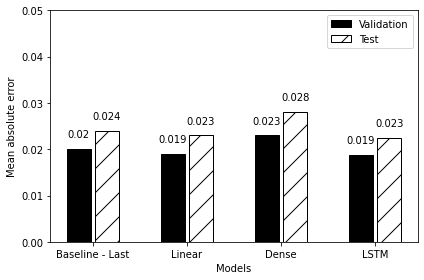

In [23]:
# Compare the MAEs of the LSTM, DNN linear model and the baselines
x = np.arange(len(mo_model_list))

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x - 0.15, mo_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mo_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel("Mean absolute error")
ax.set_xlabel("Models")

for index, value in enumerate(mo_mae_val):
    plt.text(x=index - 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(mo_mae_test):
    plt.text(x=index + 0.15, y=value + 0.0025, s=str(round(value, 3)), ha='center')
    
plt.ylim(0, 0.05)
plt.xticks(ticks=x, labels=mo_model_list)
plt.legend(loc='best')
plt.tight_layout()

In [24]:
# Record end time
end = dt.now()
elapsed = end - start

print("The program took: %02d:%02d:%02d:%02d" % (elapsed.days, elapsed.seconds // 3600, elapsed.seconds // 60 % 60, elapsed.seconds % 60))

The program took: 00:00:22:40
